![title](tabelas.png)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

tabela = pd.read_csv('barcos_ref.csv')
display(tabela)

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


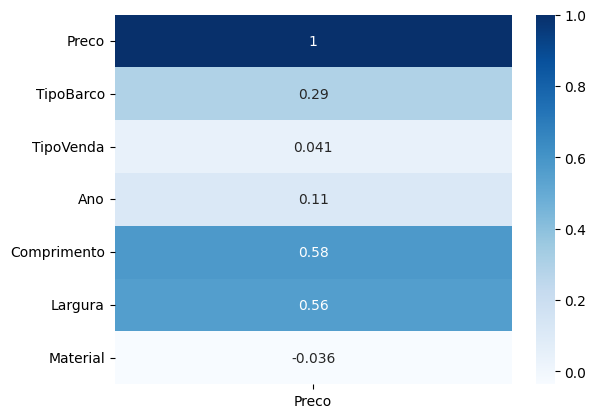

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(tabela.corr()[['Preco']],annot=True,cmap='Blues')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

y = tabela['Preco']
x = tabela.drop('Preco',axis=1)

x_treino,x_teste,y_treino,y_teste = train_test_split(x,y, test_size=0.3, random_state=1)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

modelo_regressaolinear.fit(x_treino,y_treino)
modelo_arvoredecisao.fit(x_treino,y_treino)

RandomForestRegressor()

In [12]:
from sklearn import metrics

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))

0.4490324760735811
0.8586759135495909


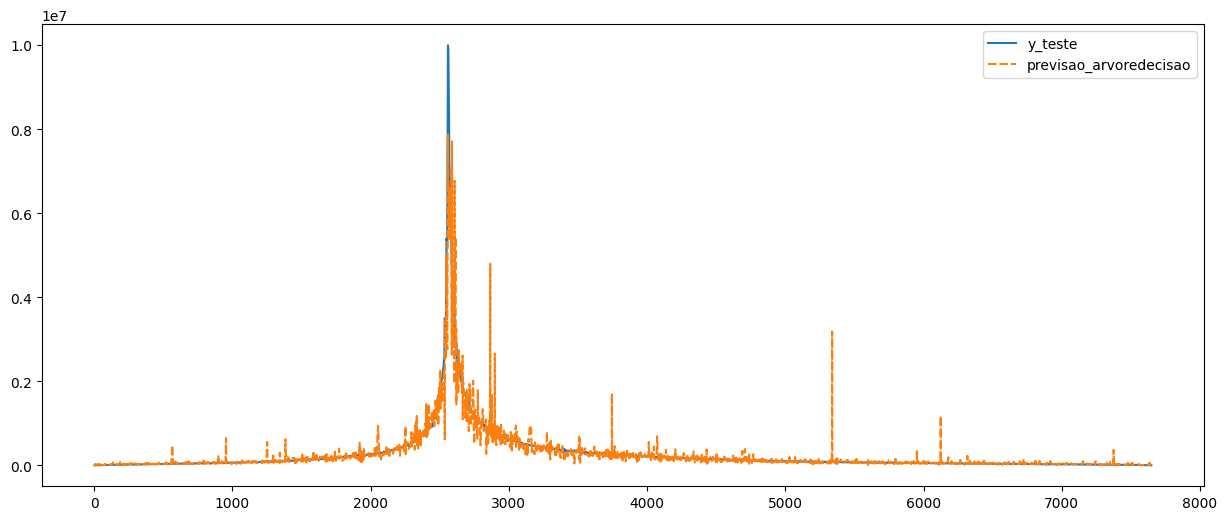

In [13]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['previsao_arvoredecisao'] = previsao_arvoredecisao

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()


In [14]:
nova_tabela = pd.read_csv('novos_barcos.csv')
display(nova_tabela)
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 6274.36775     8679.65083333 20674.9       ]
